<p style="text-align: center;"><font size="8"><b>Random Numbers</b></font><br>

In scientific computing and statistics random numbers are very important. This lecture will cover some techniques to create random numbers and introduce some important algorithms that make use up random numbers.

## Histograms

Today we will be plotting plenty of histograms. A histogram is a kind of bar graph. Given some data over a range, the range is binned. We then count how much of our data falls in each bin and do a bar graph of those numbers. The `hist()` function in matplotlib.pyplot does this for us.

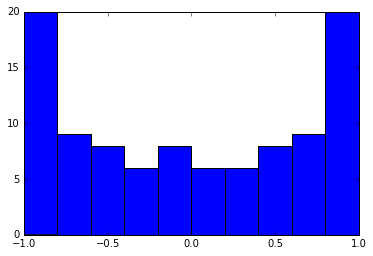

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,2*np.pi,100)
y = np.sin(x)

plt.hist(y);

The `hist()` function takes in an optional second argument that specifies where the bins should be placed. 

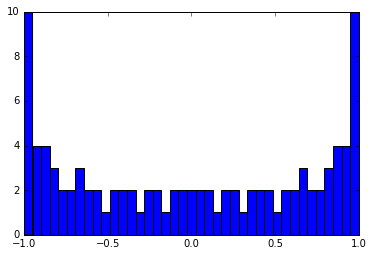

In [88]:
x = np.linspace(0,2*np.pi,100)
y = np.sin(x)

plt.hist(y,np.linspace(-1,1,40));

# Probability Density Functions

Before we talk about random numbers a quick word about probabilities is in order. 

Even though a fast-food chain might advertise a hamburger as weighing a quarter-pound, you can well imagine that it is not exactly 0.25 pounds. One randomly selected hamburger might weigh 0.22 pounds while another might weigh 0.26 pounds.  What is the probability that a randomly selected hamburger weighs between 0.23 and 0.27 pounds? That is, if we let X denote the weight of a randomly selected quarter-pound hamburger in pounds, what is P(0.23 < X < 0.27)?

*example courtesy of Penn State: https://onlinecourses.science.psu.edu/stat414/node/97*


You might imagine that it is likely that most of the hamburgers weigh close to 0.25 pounds. Probably very few weigh 0.05 pounds or 0.5 pounds for example. 

We could buy say 100 hamburgers and create a histogram of their weights:

![hamburger weights](https://github.com/lukasbystricky/ISC-3313/blob/master/lectures/chapter4/images/hamburger.png?raw=true)

We can take more samples. Let's try to buy 100,000 hamburgers:

![hamburger histogram](https://github.com/lukasbystricky/ISC-3313/blob/master/lectures/chapter4/images/hamburger_more_samples.png?raw=true)

We can also refine our histogram, by making the bin sizes smaller.

![hamburger histogram](https://github.com/lukasbystricky/ISC-3313/blob/master/lectures/chapter4/images/hamburger_small_bins.png?raw=true)

If we take this the limit, i.e. buying an infinite amount of hamburgers and creating bins with length 0, we get a continuous distribution:

![hamburger pdf](https://github.com/lukasbystricky/ISC-3313/blob/master/lectures/chapter4/images/hamburger_pdf.png?raw=true)

This is called a *probability density function* (PDF for short). A PDF, $p(x)$ has several properties:
1. $p(x)$ is positive everywhere
2. the probability that $x$ lies in an interval $[a,b]$ is given by $\int_a^b p(x)\text{d}x$
3. consequently, the area under all of $p(x)$ is 1, i.e. $\int_{-\infty}^{\infty} p(x)\text{d}x = 1$


We are now ready to answer our hamburger question. What is the probability of buying a hamburger that weights between 0.23 and 0.27 pounds?

![hamburger pdf probability](https://github.com/lukasbystricky/ISC-3313/blob/master/lectures/chapter4/images/hamburger_pdf_integrate.png?raw=true)

The integral between 0.23 and 0.27 tells us that probability. If we know beforehand a formula for the PDF we may be able to do this integral analytically. Otherwise, if the PDF is of a certain type, lookup tables might exist. Failing these two options, we can always compute this integral numerically, for example using Riemann sums.

It's important to know what a PDF does and does not tell us. A PDF tells us the probablity that a value $x$ lies within a given range. 

For continuous distributions (like this) it **does not** tell us the probablity of a single value. If we asked what is the probability of getting a hamburger weighing exactly 0.25 pounds, this is not simply $p(0.5)$. In fact the probablity of getting a hamburger weighing *exactly* 0.25 pounds is 0. This weight will always be off by at least some small amount. 

## Mean

If you a point from a distribution, what is the expected outcome? This number is called the expected value, or the *mean*. 

The mean for a continuous distribution is defined mathematically as: 
$$ \mu = \int_{-\infty}^{\infty} x p(x)\text{d}x.$$

To compute the mean of a distribution, one way is to draw a large number of points $N$ and then take their average, i.e.:
$$ \mu \approx \frac{1}{N}\sum\limits_{i=1}^N x_i.$$

## Variance

The *variance* of a distribution is the expected distance from the mean. For "peaked" distributions this is small, while for more "flat" distributions this is large. We denote the variance as $\sigma^2$, where $\sigma$ is the standard deviation of the distribution.

For a continuous distribution, the variance is given by:
$$ \sigma^2 = \int_{-\infty}^{\infty} (x-\mu)^2p(x)\text{d}x.$$

To compute the average, one way is again to draw a large number of points $N$ and then compute their average squared distance from the mean, i.e.:
$$ \sigma^2 \approx \frac{1}{N} \sum\limits_{i=1}^N (x_i - \mu)^2.$$


## Distributions

A PDF may be known or unknown before we attempt an experiment. For the hamburger example above, it is in general not known. You may be more likely to get a hamburger than is heavier than 0.25 than one that is lighter for example. 

There are some common distributions however. We will look at the two most common and well known: *uniform random distributions* and *normal distributions*.

### Uniform distribution

A uniform distribution is a distribution over an interval $[a,b]$, such that all values have the same probability of being picked. In other words $p(x)$ is constant over $[a,b]$. Since $p(x)$ must integrate to 1, this means that $p(x)$ must be equal to $1/(b-a)$ over the interval.



![uniform distribution](https://github.com/lukasbystricky/ISC-3313/blob/master/lectures/chapter4/images/uniform_distribution.png?raw=true)

The mean of a uniform distribution can be computed analytically:
$$\begin{align*}
    \mu = \int_{-\infty}^{\infty} \frac{1}{b - a}x\text{d}x &= \frac{1}{b - a}\int_a^b x\text{d}x\\
    &= \frac{1}{b - a}\frac{b^2 - a^2}{2} = \frac{b+a}{2}
\end{align*}$$

As can its variance:
$$\begin{align*}
    \sigma^2 = \int_{-\infty}^{\infty} (x-\mu)^2p(x)\text{d}x &= \int_a^b \left(x - \frac{b+a}{2}\right)^2 \frac{1}{b-a}\text{d}x\\
    &= \frac{1}{12}(b-a)^2
\end{align*}$$

## Exercise

Assuming that the weight of hamburgers follows a uniform distribution between 0.2 and 0.3 pounds, what is the probability of getting a hamburger weighing between 0.23 and 0.27 pounds? Use a left Riemann sum to compute this probability. Does it make sense?

### Normal Distribution

Normal distributions, also known as Gaussian or bell curve, is a very common probabilty distribution. The PDF is given by:

$$ p(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}.$$

![normal distribution](https://github.com/lukasbystricky/ISC-3313/blob/master/lectures/chapter4/images/normal.png?raw=true)

A particularily important normal distribution is the standard normal distribution, with $\mu = 0$ and $\sigma=1$. This distribution. 

$$ N(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}.$$

## Exercise

Assuming that the weight of hamburgers follows a normal distribution with mean 25 and variance 1, what is the probability of getting a hamburger weighing between 0.23 and 0.27 pounds? Use a left Riemann sum to compute this probability.

Recall the PDF for a normal distribution:
$$ p(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}.$$

# Random vs. Pseudo-random

There are things in nature which are truly random. For example: 
* atmospheric noise
* qunatum phenomena
* stock markets

A computer cannot directly create truly random numbers, however it can create sequences of numbers that appear random. These are known an *pseudo-random* numbers.

A series of pseudo-random numbers is typically determined by a fixed number known as a *seed*. Given the same seed value, the series of pseudo-random numbers is completely determined. 

For example, a common pseudo-random number generator is called the linear congruential generator (LCG), which uses the recurrence relation:

$$ X_{k+1} = \mod(aX_k + b, m),$$

where $a$, $b$ and $m$ are large integers. 

Once we divide $X_k$ by $m$,  $X_k$ is distributed according to a *uniform random distribution* on the interval [0,1].

Common values of $a$, $b$ and $m$ are: $a=1664525$, $b=1013904223$ and $m = 2^{32}$.

Here is an implementation of an LCG:

In [11]:
# initialize seed, a, b and m
seed = 0
a=1664525
b=1013904223
m=2**32

# N is the number of random numbers
N = 1000

# initialize list and compute first pseudo-random number from seed
X = [(a*seed + b) % m]

# apply reccurence relation
for i in range(N):
    X.append((a*X[i] + b) % m)

# divide everything by m to get all numbers in the range [0,1]
X = [r/m for r in X]

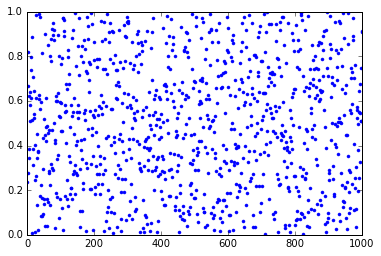

In [12]:
plt.plot(X, '.');

We can do a histogram of the points to see that they are approximately uniformly distributed.

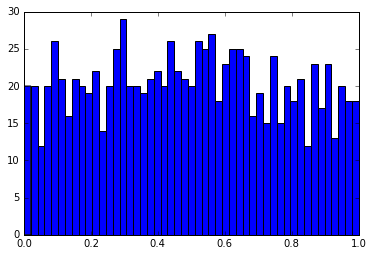

In [13]:
import numpy as np
plt.hist(X, np.linspace(0,1));

## Exercise

Using the formulas for the mean and variance shown earlier, compute the mean of 10000 randomly generated numbers. Compare to the theoretical mean and variance for the uniform distribution on [0,1].

$$ \mu \approx \frac{1}{N}\sum\limits_{i=1}^N x_i$$

$$ \sigma^2 \approx \frac{1}{N} \sum\limits_{i=1}^N (x_i - \mu)^2$$

## Normal Distributions

To generate samples from a standard normal distribution we can use the **Box-Muller transform**. 

Given two uniformly distributed random numbers in the interval (0,1), call them $X_1$ and $X_2$, we can get two independent random variables with a standard normal distribution, call them $Z_1$ and $Z_2$ using the tranformations:
$$
\begin{align*}
    Z_1 &= \sqrt{-2 \log X_1}\cos(2\pi X_2)\\
    Z_2 &= \sqrt{-2 \log X_1}\sin(2\pi X_2)
\end{align*}
$$


In [14]:
seed = 0
a=1664525
b=1013904223
m=2**32

# generate X1 and X2
X1 = (a*seed_x + b) % m
X2 = (a*X1 + b) % m

# put into interval (0,1)
X1 /= m
X2 /= m

# appy Box-Muller transform
Z1 = np.sqrt(-2*np.log(X1))*np.cos(2*np.pi*X2)
Z2 = np.sqrt(-2*np.log(X1))*np.sin(2*np.pi*X2)

print("X1 = ", X1)
print("X2 = ", X2)
print("Z1 = ", Z1)
print("Z2 = ", Z2)

X1 =  0.23606797284446657
X2 =  0.278566908556968
Z1 =  -0.303355886649
Z2 =  1.67189897896


Let's generate an entire distribution of random numbers with a standard normal distribution.

In [15]:
# initialize seed, a, b and m
seed_x = 0
seed_y = 1
a=1664525
b=1013904223
m=2**32

# N is the number of random numbers
N = 1000

# initialize lists and compute first pseudo-random number from seed

X = [(a*seed_x + b) % m]
Y = [(a*seed_y + b) % m]

# apply reccurence relation
for i in range(N):
    X.append((a*X[i] + b) % m)
    Y.append((a*Y[i] + b) % m)

# divide everything by m to get all numbers in the range [0,1]
X = [r/m for r in X]
Y = [r/m for r in Y]

# create normal distribution
Z = []
for i in range(N):
    Z.append(np.sqrt(-2*np.log(X[i]))*np.cos(2*np.pi*Y[i]))
    Z.append(np.sqrt(-2*np.log(X[i]))*np.sin(2*np.pi*Y[i]))
    

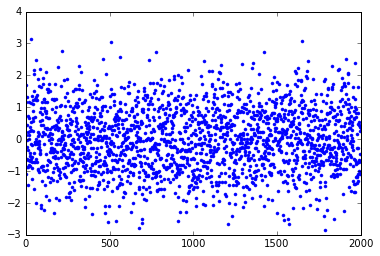

In [16]:
plt.plot(Z, '.');

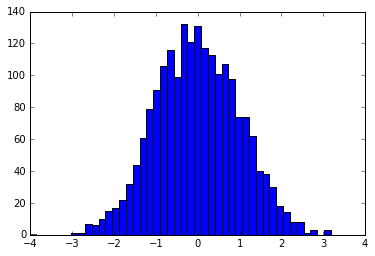

In [17]:
plt.hist(Z,np.linspace(-4,4));

## Exercise

Using the formulas for the mean and variance shown earlier, compute the mean of 10000 randomly generated numbers from the standard normal distribution. Compare to the theoretical mean and variance.

## Properties of LCG

What are some of the properties of this list of numbers?

* Periodicity: this sequence will eventually be periodic. The maximum period is $m$. It has a period of exactly $m$ if and only if: 
    * $m$ and $c$ are relatively prime
    * $a-1$ is divisible by all prime factors of $m$
    * $a-1$ is divisible by 4 if $m$ is divisible by 4  


* Randomness: we can think of each number as being drawn uniformly random from the interval [0,1]
* Defects: in addition to periodicity, in $n$ dimensional space, points will lie on at most $(n!m)^{1/n}$ hyperplanes

In 2D this defect isn't so bad because $(n!m)^{1/n} = (2m)^{1/2}$. If $m=2^{32}$ this is $2^{33/2}$ which is still quite large.

In 3D however we have $(n!m)^{1/3} = (6m)^{1/3}$. If $m = 2^{32}$, this now on the order of $2^{11} = 2048$.

![3d lcg](https://github.com/lukasbystricky/ISC-3313/blob/master/lectures/chapter5/images/lcg.gif?raw=true)

# Random Library

NumPy implements a random number library under `numpy.random`. The `rand()` function from this library returns a uniform random number on [0,1].

In [21]:
import numpy.random as rand

rand.rand()

0.3151343176743189

In [22]:
rand.rand()

0.8236095032433643

The random number generator used by NumPy is the [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister) algorithm. Like LCG this is a pseudorandom number from a seeded deterministic algorithm. The seed can be specified using the `random.seed()` function.

An optional second parameter can be specified, which is the number of random samples to draw. The default is 1.

In [23]:
rand.seed(1222)
rand.rand(4)

array([ 0.06748528,  0.33494299,  0.36839425,  0.48359485])

In [24]:
rand.seed(1222)
rand.rand(4)

array([ 0.06748528,  0.33494299,  0.36839425,  0.48359485])

## Exercise

Using the `rand()` function, generate 1000 random numbers and plot a histogram using the `hist()` function from `matplotlib.pyplot`. Calculate the mean and variance.

The `normal()` function takes in two parameters, a mean and a standard deviation and returns a number drawn from the appropriate normal distribution. 

Note that an input is the standard deviation $\sigma$ and not the variance $\sigma^2$.

In [28]:
x1 = rand.normal(1,2) # mean is 1 and variance is 2^2 = 4
print(x1)

x2 = rand.normal(1,2)
print(x2)

4.710007371802641
0.7934476958547285


As with `rand()`, an optional parameter can be input to generate multiple numbers at once.

In [41]:
x = rand.normal(1,2,10)
print(x)

[ 3.86885118  3.05316514  2.47176544  1.56499041  1.59532368 -2.38926737
  1.67267646  0.10452868 -1.43799122 -1.97407029]


## Exercise

Using the `normal()` function, generate 1000 random numbers from the normal distribution with mean 4 and standard deviation 2. Plot a histogram using the `hist()` function from `matplotlib.pyplot`. Calculate the mean and variance.

The `numpy.random` module also includes a function `randint()` that returns a random integer. This function takes in two arguments, $x_1$ and $x_2$ and returns a random integer from the range $x_1$ up to *but not including* $x_2$

In [25]:
x = rand.randint(1,7)
print(x)

3


## Exercise

Create a histogram of 1000 numbers generated with the `randint()` function in the range 0 to 10. 

# Monte Carlo Simulations

Probability theory lets us compute the probablility that a certain event happens. For example, we can compute the probability of rolling two consecutive ones a six sided dice:
$$ P(\text{two consecutive ones}) = P(\text{one})\times P(\text{one}) = \frac{1}{6}\times\frac{1}{6} = \frac{1}{36}$$

We can use more complicated rules to compute things like the probability of rolling at least two ones in a five run stretch. Unfortunately, these calculations can become tedious or impossible if the problem becomes too complicated. 

Monte Carolo simulations are a simple numerical way to compute probablilities. 

Assume we are performing $N$ experiments where the outcome of each one is random. Some event $A$ takes place $M$ times in these $N$ experiments. We can estimate the probability of the event as:
$$ P(A) \approx \frac{M}{N}.$$

This estimate becomes more accurate as $N$ increases and approaches the actual probability as $N\to\infty$. This is known as a Monte Carlo simulation. Monte Carlo methods were developped in the 1940s to help with the nuclear weapons research. They have since found uses throughout science and engineering. 

## Example: Throwing Dice

We'll return to our example from earlier. What is the probability of rolling two consecutive ones on a six sided dice? We know this should be $1/36$.

In [42]:
# set N - the number of times we roll 2 dice
N = 1000

# initialize M to 0
M = 0

# we know actual probability
p_act = 1.0/36

for i in range(N):
    
    r1 = rand.randint(1,7)
    r2 = rand.randint(1,7)
    
    if (r1 == 1 and r2 == 1):
        M += 1

print("Actual P:", p_act)
print("Simulated P:", M/N)
print("Simulation error:", abs(p_act - M/N))

Actual P: 0.027777777777777776
Simulated P: 0.026
Simulation error: 0.0017777777777777774


Let's try for various values of $N$:

[0.1, 0.03, 0.023, 0.029, 0.02844]


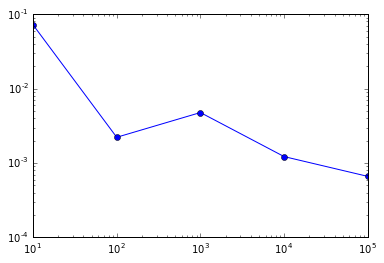

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

N = [10, 100, 1000, 10000, 100000]
P = []
P_err = []

# we know actual probability
p_act = 1.0/36

for n in N:
    M = 0

    for i in range(n):
    
        r1 = rand.randint(1,7)
        r2 = rand.randint(1,7)
    
        if (r1 == 1 and r2 == 1):
            M += 1
            
    P.append(M / n)
    P_err.append(abs(p_act - M / n))
    
print(P)
plt.loglog(N,P_err, '-o');

What is the probability of rolling at least two ones in fives throws?

In [44]:
# set N - the number of times we roll 2 dice
N = 1000

# initialize M to 0
M = 0

for i in range(N):
    
    n_ones = 0
    
    # roll 6 dice
    for roll in range(5):
        
        r = rand.randint(1,7)
        
        # check if you rolled a one
        if r == 1:
            n_ones += 1
      
    # if you rolled at least 2 ones, mark trial as success
    if n_ones >= 2:
        M += 1

print("Simulated P:", M/N)

Simulated P: 0.183


## Monty Hall Problem

"Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?"

In [53]:
import numpy as np

N = 10000
M = 0

for i in range(N):
    
    # define prizes
    prizes = ["goat", "goat", "car"]
    
    # shuffle list
    np.random.shuffle(prizes)
    
    # player picks random number
    guess = np.random.randint(3)
    player_prize = prizes.pop(guess)
    
    # now prizes contains one or two goats
    # host reveals a goat
    goat_index = prizes.index("goat")
    
    # player switches
    prizes.pop(goat_index)
    player_prize = prizes[0]
    
    if player_prize == "car":
        M += 1
        
p = M/N
print("probability of winning after switching is", p)

probability of winning after switching is 0.6648


## Exercise

Imagine we flip a coin 10 times. What is the probability of us getting exactly 8 heads?

Run a simulation 10000 times and plot a histogram of the number of heads.